In [123]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.9.0)


# import

In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import datetime
from datetime import datetime, timedelta

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/bednights2016/bednights2016_transposed.csv
/kaggle/input/countries/countries_transposed.csv


In [125]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [126]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [127]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [128]:
bednights2016_df= pd.read_csv('/kaggle/input/bednights2016/bednights2016_transposed.csv')
display(bednights2016_df)

,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Sweden,United Kingdom,Iceland,Liechtenstein,Norway,Switzerland,Montenegro,North Macedonia,Serbia,Turkey
0,17.063194,16.150666,24.268149,11.630004,79.946914,4.014581,16.190381,87.91285,294.556428,123.91341,...,13.997265,279.453071,6.764038,0.127747,9.672993,23.982739,10.528475,1.050917,2.735528,65.793316


In [129]:
countries_df= pd.read_csv('/kaggle/input/countries/countries_transposed.csv')
display(countries_df)

,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,...,Oporto,Oslo,Paris,Prague,Rome,Sofia,Stockholm,Vienna,Warsaw,Zurich
0,Netherlands,Greece,Spain,Germany,Slovakia,Belgium,Hungary,Denmark,Ireland,United Kingdom,...,Portugal,Norway,France,Czechia,Italy,Bulgaria,Sweden,Austria,Poland,Switzerland


In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [131]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [132]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [133]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [134]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [135]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [136]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

In [138]:
#НУЛИ
data['Number of Reviews']=data['Number of Reviews'].fillna(0)

In [139]:
#URL_TA — URL страницы ресторана на TripAdvisor;

pd.set_option("max_colwidth", 110)

display(data['URL_TA'])

pd.reset_option("max_colwidth")
#URL_TA — URL страницы ресторана на TripAdvisor, не вижу, что из него можно получить, буду удалять

0                                    /Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html
1                                 /Restaurant_Review-g189934-d6674944-Reviews-Ravintola_Kolmon3n-Helsinki_Uusimaa.html
2                                       /Restaurant_Review-g186525-d13129638-Reviews-Black_Ivy-Edinburgh_Scotland.html
3                                             /Restaurant_Review-g186338-d680417-Reviews-Quirinale-London_England.html
4                     /Restaurant_Review-g274924-d1112354-Reviews-Massimo_Ristorante-Bratislava_Bratislava_Region.html
                                                             ...                                                      
49995                                      /Restaurant_Review-g187849-d2104414-Reviews-Rosso_Brera-Milan_Lombardy.html
49996                                 /Restaurant_Review-g187147-d1800036-Reviews-La_Favorite-Paris_Ile_de_France.html
49997                                          /

In [140]:
# ПОКА ТАК
data=data.drop(['URL_TA', 'ID_TA'],axis=1)

# PRICE RANGE

In [141]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [142]:
display(data['Price Range'].isnull().sum())

17361

In [143]:
def level_of_prices(string):   # Конвертируем символьно обозначенные уровни цен в нумеративные...
    
    if str(string)=='nan': # заодно позаботимся о NAN
        level=0
    else:
        if len(string)==1:
            level=1        #Низкий
        elif len(string)==4:   
            level=3       #Высокий
        else:
            level=2       #Средний
    return level

In [144]:
data['how_expensive']=data['Price Range'].apply(level_of_prices)  # ... путём создания нового признака how_expensive
display(data.head(2))

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,how_expensive
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",0,0.0,2
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,2


In [145]:
#Теперь позаботимся о нулях. Заполним отсутствующие данные по ценовому диапазону средними _по_городу_ значениями

In [146]:
unique_cities=data['City'].unique()
display(unique_cities, len(unique_cities))      #Заметим, что торода исключительно европейские

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw',
       'Oporto', 'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

31

In [147]:
# Создаём данные для заполнения пропущенных цен:
cities=data['City']
average_price_level_by_city={}

for city in cities:
    mean_price=data[(data['City']==city) & (data['how_expensive']!=0)]['how_expensive'].mean()
    average_price_level_by_city.update({city:round(mean_price,2)})
    
print(average_price_level_by_city)  

{'Paris': 1.89, 'Helsinki': 1.87, 'Edinburgh': 1.71, 'London': 1.81, 'Bratislava': 1.86, 'Lisbon': 1.73, 'Budapest': 1.72, 'Stockholm': 1.94, 'Rome': 1.73, 'Milan': 1.74, 'Munich': 1.91, 'Hamburg': 1.86, 'Prague': 1.74, 'Vienna': 1.86, 'Dublin': 1.79, 'Barcelona': 1.78, 'Brussels': 1.86, 'Madrid': 1.85, 'Oslo': 1.94, 'Amsterdam': 1.83, 'Berlin': 1.74, 'Lyon': 1.9, 'Athens': 1.71, 'Warsaw': 1.81, 'Oporto': 1.67, 'Krakow': 1.65, 'Copenhagen': 1.9, 'Luxembourg': 1.98, 'Zurich': 1.97, 'Geneva': 2.05, 'Ljubljana': 1.75}


In [148]:
def swap_zeros(price, city):
    if price==0:
        return average_price_level_by_city[city]
    else:
        return price

In [149]:
# Заполняем значения в DataFrame

data['how_expensive']=data.apply(lambda x: swap_zeros(x['how_expensive'],x['City']),axis=1)


In [150]:
display(data[['City','how_expensive']])

,City,how_expensive
0,Paris,2.00
1,Helsinki,2.00
2,Edinburgh,2.00
3,London,3.00
4,Bratislava,3.00
...,...,...
49995,Milan,2.00
49996,Paris,2.00
49997,Stockholm,1.94
49998,Warsaw,2.00


In [151]:
data[['how_expensive','Rating']].corr() # Признак уровня цен слабо скоррелирован с рейтингом, да ещё и негативно. Видать, не в деньгах счастье

,how_expensive,Rating
how_expensive,1.00000,-0.00975
Rating,-0.00975,1.00000


# Cities

In [152]:
# Города уйдут в DUMMY-переменные
# Их не так уж много,31 штука, все в Европе, можно и не группировать:

dummy=pd.get_dummies(data.City,columns=['City'],prefix='',prefix_sep='')

In [153]:
data=pd.concat([data,dummy],axis=1) 

In [154]:
display(data.shape)

(50000, 41)

In [155]:
#Количество ресторанов в городе, участвующих в рейтинге?

In [156]:
restaurants=data.groupby(['City'])['Restaurant_id'].count()
restaurants_df=restaurants.reset_index()
restaurants_df=restaurants_df.set_index('City')
display(restaurants_df.head(5))

,Restaurant_id
City,
Amsterdam,1372
Athens,776
Barcelona,3395
Berlin,2705
Bratislava,380


In [157]:
restaurants_df=restaurants_df.T
rest_disct=restaurants_df.to_dict(orient='records')
display(rest_disct[0]['Brussels'])

1314

In [158]:
data['Nr_restaurants']=data['City'].apply(lambda x:rest_disct[0][x])
display(data[['City','Nr_restaurants']].head(5))

,City,Nr_restaurants
0,Paris,6108
1,Helsinki,475
2,Edinburgh,745
3,London,7193
4,Bratislava,380


In [159]:
data[['Nr_restaurants','Rating','Ranking']].corr() #Чем больше ресторанов в городе, тем ниже рейтинг. Больший выбор делает посетителей более требовательными и разборчивыми

,Nr_restaurants,Rating,Ranking
Nr_restaurants,1.000000,-0.014779,0.709012
Rating,-0.014779,1.000000,-0.109897
Ranking,0.709012,-0.109897,1.000000


In [160]:
# Количество ресторанов сильно скоррелировано с Ranking
# Превратим их в один признак

In [161]:
data['Ranking']=data['Ranking']/data['Nr_restaurants']
display(data[['Ranking','Nr_restaurants']].head(2))

,Ranking,Nr_restaurants
0,2.122299,6108
1,0.223158,475


In [162]:
data[['Rating','Ranking']].corr() #Недостаточно данных, чтобы делать выводы. На чём основан местный Ranking?

,Rating,Ranking
Rating,1.000000,-0.168728
Ranking,-0.168728,1.000000


In [163]:
#Добавим вспомогательный признак СТРАНА по городу:

countries_dict=countries_df.iloc[:32].to_dict(orient='records')
display(countries_dict[0]['Berlin'])

'Germany '

In [164]:
data['Country']=data['City'].apply(lambda x:countries_dict[0][x])
display(data.head(2))

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,how_expensive,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Nr_restaurants,Country
0,id_0,Paris,"['Bar', 'Pub']",2.122299,$$ - $$$,4.0,"[[], []]",0,0.0,2.0,...,0,1,0,0,0,0,0,0,6108,France
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",0.223158,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,2.0,...,0,0,0,0,0,0,0,0,475,Finland


In [165]:
#Применим статистические данные о количестве миллионов туристоночей за 2016 года по странам Евросоюза. 
#Информация взята отсюда https://ec.europa.eu/eurostat/databrowser/view/tour_occ_ninat/default/table?lang=en

In [166]:
bednights2016_dict=bednights2016_df.to_dict(orient='records')
display(bednights2016_dict[0]['France'])

123.91341000000001

In [167]:
data['bednights2016']=data['Country'].apply(lambda x:bednights2016_dict[0][x])
display(data.head(5))

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,how_expensive,...,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,Nr_restaurants,Country,bednights2016
0,id_0,Paris,"['Bar', 'Pub']",2.122299,$$ - $$$,4.0,"[[], []]",0,0.0,2.0,...,1,0,0,0,0,0,0,6108,France,123.913410
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",0.223158,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,2.0,...,0,0,0,0,0,0,0,475,Finland,5.771275
2,id_2,Edinburgh,['Vegetarian Friendly'],1.087248,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,2.0,...,0,0,0,0,0,0,0,745,United Kingdom,279.453071
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",0.232031,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,3.0,...,0,0,0,0,0,0,0,7193,United Kingdom,279.453071
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",0.097368,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,3.0,...,0,0,0,0,0,0,0,380,Slovakia,5.038214


In [168]:
data[['bednights2016','Rating']].corr() # Как-то странно влияют ночующие туристы на рейтинг ресторанов. Чем больше туристов, тем хуже севис?

,bednights2016,Rating
bednights2016,1.000000,-0.013046
Rating,-0.013046,1.000000


# Cuisine

In [169]:
cusines=data['Cuisine Style'] 

nonunique_cusines=[] # Промежуточный список

variety_count=[] #пригодится дополнительно проанализировать данные, хоть и не будет использоваться непосредственно

for item in cusines:
    if str(item)=='nan':
        item=0
        variety_count.append(1)
    else:
        string_to_list=item[1:-1].split(', ')
        variety_count.append(len(string_to_list))
        
        for string in string_to_list:
            word=string.strip("''")
            nonunique_cusines.append(word)

In [170]:
# Функция, чтобы вычленять уникальные значения из списка
def unique(list1): 
      
    # Шарик входит...
    list_set = set(list1) 
    # ... и выходит. 
    unique_list = (list(list_set)) 
    return unique_list

In [171]:
list_un_cusines=unique(nonunique_cusines) #Список уникальных значений Cuisine

In [172]:
def variety(string):        #Считает количество представленных в каждом ресторане кухонь
    variety_count=0
    if str(string)=='nan':
        variety_count=1         # заодно избавимся от NaN: там, где кухня не указана, будем считать, она одна - неопределённая
    else:
        string_to_list=string[1:-1].split(', ')
        variety_count=len(string_to_list)
        #print(string_to_list)
    return variety_count

In [173]:
# НОВЫЙ ПРИЗНАК: РАЗНООБРАЗИЕ

data['Cusine_variety']=data['Cuisine Style'].apply(variety)
display(data[['Cuisine Style','Cusine_variety']].head(2))

,Cuisine Style,Cusine_variety
0,"['Bar', 'Pub']",2
1,"['European', 'Scandinavian', 'Gluten Free Opti...",5


In [174]:
data[['Cusine_variety','Rating']].corr()  # Вполне логично, чем больше выбор, тем больше вкусов удовлетворено

,Cusine_variety,Rating
Cusine_variety,1.000000,0.034506
Rating,0.034506,1.000000


In [175]:
# Изучение списка направлений кухни, и тот факт, что в датасете присутствуют только европейские города,
# позволяет выделить 4 главных категории направлений кухни:

nutricion_concious=['Kosher',  'Gluten Free Options', 'Halal', 'Healthy',  'Vegetarian Friendly',  'Vegan Options']
                    

ethnic=[ 'Filipino', 'Ethiopian', 'Thai', 'Vietnamese','Malaysian', 'Albanian', 'Cajun & Creole',
        'Indonesian','Colombian', 'Japanese',  'Pakistani', 'Taiwanese', 'Minority Chinese', 'South American', 'Moroccan', 
       'Indian', 'Egyptian', 'Cambodian', 'Armenian', 'Bangladeshi', 'Israeli', 'Lebanese', 'Xinjiang',
        'Middle Eastern', 'Mexican', 'Afghani',  'Tibetan', 'Peruvian', 'Sushi',  'Persian', 'Polynesian', 'Georgian',
         'Uzbek', 'Caribbean',  'Chilean', 'Sri Lankan', 'Tunisian', 'Asian',  'Burmese',  'Nepali', 'Brazilian', 'Mongolian',
         'Venezuelan', 'Cuban', 'Latin',  'Native American','Hawaiian','Azerbaijani', 'Korean', 'Salvadoran', 'Chinese',
         'Singaporean', 'African', 'Ecuadorean',  'Russian', 'Arabic', 'Fujian', 'Yunnan']

european=['French',  'Greek', 'Barbecue', 'Steakhouse','Central European',  'Norwegian','Jamaican', 'Turkish', 
          'Central Asian',  'Scandinavian', 'Romanian',  'Latvian', 'Dutch', 'Swedish', 'Slovenian',  'Canadian',  'Balti',
         'Mediterranean','Danish', 'German',  'American', 'Australian',  'Italian', 'Argentinean',  'Ukrainian',   'Irish',
         'British', 'Welsh', 'Delicatessen', 'Polish', 'Czech', 'Croatian', 'Eastern European', 'Belgian',  'Swiss', 'Hungarian',
          'Portuguese', 'Southwestern', 'Caucasian',  'Austrian', 'Scottish',  'European', 'New Zealand', 'Central American',
         'Spanish']
        

non_specific=['Wine Bar', 'Diner', 'International', 'Fast Food','Street Food',   'Contemporary',  'Brew Pub',  'Fusion', 
             'Cafe',    'Grill', 'Pizza',  'Soups', 'Gastropub',  'Seafood',  'Bar','Pub']

#Из этих 4 первое лежит в несколько другой плоскости: осознанное отношение к  составу продуктов, 
# в то время как две другии определяют вкус блюд, а четврётое - формат подачи.


In [176]:
# изучение популярности упоминания nutricion concious направлений наталкивает на мысль, 
# что это тренд в Европе, (в датасете присутствуют только европейские города):

cusines_array=np.array(nonunique_cusines)
popularity_count={}

for un_cus in list_un_cusines:
    popularity_count.update({un_cus:0})

print(len(popularity_count))


for cusine in cusines_array:
    count=popularity_count[cusine]+1
    popularity_count.update({cusine:count})
#print(popularity_count)

df_popular_cusines=pd.DataFrame.from_dict(popularity_count,orient='index',columns=['popularity']).reset_index()
df_popular_cusines.columns=['Cusine','popularity']
popular_df=df_popular_cusines.sort_values(by='popularity', ascending=False)
display(popular_df.head(15))

125


,Cusine,popularity
51,Vegetarian Friendly,14021
16,European,12561
101,Mediterranean,7820
110,Italian,7433
72,Vegan Options,5684
106,Gluten Free Options,5185
46,Bar,4094
18,French,3970
104,Asian,3786
68,Pizza,3502


In [177]:
# НОВЫЕ ПРИЗНАКИ

In [178]:
def categorization(cuisine):   
    binary_score=int()    
    if str(cuisine)=='nan':
        binary_score=0    
    else:
        for category in list_to_categorize:
            if str(category).lower() in str(cuisine).lower():
                binary_score=1
    return binary_score

In [179]:
list_to_categorize=nutricion_concious

data['nutricion_concious']=data['Cuisine Style'].apply(categorization)

pd.set_option("max_colwidth", 110)
display(data[['Cuisine Style','Cusine_variety','nutricion_concious']].sample(3))
pd.reset_option("max_colwidth")

,Cuisine Style,Cusine_variety,nutricion_concious
35662,['Thai'],1,0
21863,NaN,1,0
19957,"['Japanese', 'Asian', 'Vegetarian Friendly', 'Vegan Options']",4,1


In [180]:
# Признак ОСОЗНАННОЕ ПОТРЕБЛЕНИЕ ПИЩИ

data[['nutricion_concious','Rating']].corr() # По сравнению с другими признаками, взятыми на основе Cuisine Style, этот имеет наибольшее влияние на рейтинг

,nutricion_concious,Rating
nutricion_concious,1.000000,0.040205
Rating,0.040205,1.000000


In [181]:
# Исследуем влияние вкусов:

In [182]:
list_to_categorize = european

data['european']=data['Cuisine Style'].apply(categorization)

pd.set_option("max_colwidth", 110)
display(data[['Cuisine Style','Cusine_variety','european']].sample(3))
pd.reset_option("max_colwidth")

,Cuisine Style,Cusine_variety,european
23808,['Barbecue'],1,1
43347,"['Bar', 'Pub']",2,0
18618,['Sushi'],1,0


In [183]:
data[['european','Rating']].corr() # Всё понятно. В Питере пить. В Европе есть европейскую кухню.

,european,Rating
european,1.000000,0.015861
Rating,0.015861,1.000000


In [184]:
list_to_categorize = ethnic

data['ethnic']=data['Cuisine Style'].apply(categorization)

pd.set_option("max_colwidth", 110)
display(data[['Cuisine Style','Cusine_variety','ethnic']].sample(3))
pd.reset_option("max_colwidth")

,Cuisine Style,Cusine_variety,ethnic
29713,"['Italian', 'Pizza', 'Mediterranean', 'Vegetarian Friendly', 'Gluten Free Options']",5,0
17236,"['Czech', 'European']",2,0
393,"['Italian', 'Pizza', 'Mediterranean', 'Vegetarian Friendly', 'Vegan Options']",5,0


In [185]:
data[['ethnic','Rating']].corr() #Этническая кухня не ососбо популярна в Европе

,ethnic,Rating
ethnic,1.000000,-0.009857
Rating,-0.009857,1.000000


In [186]:
list_to_categorize = non_specific

data['non_specific']=data['Cuisine Style'].apply(categorization)

pd.set_option("max_colwidth", 110)
display(data[['Cuisine Style','Cusine_variety','non_specific']].sample(3))
pd.reset_option("max_colwidth")

,Cuisine Style,Cusine_variety,non_specific
27193,"['Japanese', 'Sushi', 'European', 'Asian', 'Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options']",7,0
20800,"['Bar', 'Pub', 'American', 'International']",4,1
8682,NaN,1,0


In [187]:
data[['non_specific','Rating']].corr() # Формат заведения  имеет большее значение, чем в каком стиле приготовлена пища

,non_specific,Rating
non_specific,1.000000,0.012082
Rating,0.012082,1.000000


# REVIEWS

In [188]:
#Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
#проблема в том, что их не всегда два.

pd.set_option("max_colwidth", 110)

display(data['Reviews'][0])
display(data['Reviews'][31])
display(data['Reviews'][48])

pd.reset_option("max_colwidth")

'[[], []]'

"[['Very good food'], ['09/24/2017']]"

"[['Thomas'], ['01/06/2016']]"

In [189]:
display(data[data['Reviews'].isnull()])

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,sample,Rating,how_expensive,...,Warsaw,Zurich,Nr_restaurants,Country,bednights2016,Cusine_variety,nutricion_concious,european,ethnic,non_specific
8168,id_8168,Lisbon,NaN,2.057681,NaN,2.0,NaN,0,0.0,1.73,...,0,0,1647,Portugal,43.959295,1,0,0,0,0
9608,id_9608,Vienna,NaN,1.232848,NaN,0.0,NaN,0,0.0,1.86,...,0,0,1443,Austria,83.398372,1,0,0,0,0


In [190]:
def date1_extraction(string):  #для первого отзыва, если он есть
  
    if str(string)=='nan':
       
        date1=0
    else:
        date1=(string[2:-2].split('], [')[1]).split(', ')[0].strip("''")
  
        if len(date1)==0:
            date1=0
        else:
            date1=datetime.strptime(date1,'%m/%d/%Y')

    return date1

In [191]:
def date2_extraction(string): #для второго отзыва, если он есть
    if str(string)=='nan':
        date2=0

    elif len(string[2:-2].split('], [')[1])==0:
        date2=0 
    
    elif len(string[2:-2].split('], [')[1])>12:
        date2=datetime.strptime((string[2:-2].split('], [')[1]).split(', ')[1].strip("''"),'%m/%d/%Y')
    else: 
        date2=0
    
    return date2

In [192]:
# Промежуточные признаки

data['review1date']=data['Reviews'].apply(date1_extraction)

data['review2date']=data['Reviews'].apply(date2_extraction)

display(data.iloc[0:5][['Reviews','review1date','review2date']])

,Reviews,review1date,review2date
0,"[[], []]",0,0
1,"[['Very good reviews!', 'Fine dining in Hakani...",2017-12-05 00:00:00,2017-10-29 00:00:00
2,"[['Better than the Links', 'Ivy Black'], ['12/...",2017-12-28 00:00:00,2017-12-06 00:00:00
3,"[['Most exquisite', 'Delicious and authentic']...",2017-12-06 00:00:00,2017-11-22 00:00:00
4,"[['Always the best in bratislava', 'Very good ...",2018-02-08 00:00:00,2018-01-24 00:00:00


In [193]:
sorted_dates1=data[data['review1date']!=0]['review1date'].sort_values(ascending=False).reset_index() # точка отсчёта для первого ревью
most_recent_date1=sorted_dates1.iloc[0]['review1date']
display(most_recent_date1)

Timestamp('2018-02-26 00:00:00')

In [194]:
sorted_dates2=data[data['review2date']!=0]['review2date'].sort_values(ascending=False).reset_index() # точка отсчёта для расчёта давности отзыва
most_recent_date2=sorted_dates2.iloc[0]['review2date']
display(most_recent_date2)

Timestamp('2018-02-26 00:00:00')

#НОВЫЕ ПРИЗНАКИ!!!

In [195]:
def age_of_review(date):
    reference_date=datetime(2018,2,26) # за точку отсчёта взята самая свежая дата из представленных
    
    if date==0:
        age=0
        
    else:
        age=(reference_date-date).days
    return age

In [196]:
data['age_of_review1']=data['review1date'].apply(age_of_review)

data['age_of_review2']=data['review2date'].apply(age_of_review)

display(data.iloc[30:32][['Reviews','age_of_review1','age_of_review2']])

,Reviews,age_of_review1,age_of_review2
30,"[['Atmosphere and drinks nice', 'Spectacular V...",205,149
31,"[['Very good food'], ['09/24/2017']]",155,0


In [197]:
#заполним пропуски в давности отзывов средними значениями

fill_zero_age1 = round(data['age_of_review1'].mean())
fill_zero_age2=round(data['age_of_review2'].mean())
fill_age=int((fill_zero_age1+fill_zero_age2)/2)
display(fill_age)

257

In [198]:
data['age_of_review1']=data['age_of_review1'].apply(lambda x: 257 if x==0 else x)
data['age_of_review2']=data['age_of_review2'].apply(lambda x: 257 if x==0 else x)


In [199]:
data[['age_of_review1','age_of_review2']].corr() #Они несколько скоррелированы между собой. Превращу их в один

,age_of_review1,age_of_review2
age_of_review1,1.000000,0.537413
age_of_review2,0.537413,1.000000


In [200]:
def mean_age(age1, age2):
    age=(age1+age2)/2
    return age

In [201]:
data['mean_age_of_review']=data.apply(lambda x:mean_age(x['age_of_review1'],x['age_of_review2']),axis=1)

display(data['mean_age_of_review'].head(2))

0    257.0
1    101.5
Name: mean_age_of_review, dtype: float64

In [202]:
data[['mean_age_of_review','Rating']].corr() # Негативная корреляция: чем свежее отзыв (возраст отзыва меньше), тем лучше для рейтинга

,mean_age_of_review,Rating
mean_age_of_review,1.000000,-0.035531
Rating,-0.035531,1.000000


In [203]:
# Пропробуем оценить тон отзывов

pd.set_option("max_colwidth", 110)

display(data['Reviews'].sample(10))

pd.reset_option("max_colwidth")

23897                [['Simple, delicious food, home style!', 'Free Neighborhood Fado'], ['10/03/2017', '12/21/2016']]
39700                                                   [['Nice and friendly', 'Awful'], ['06/26/2017', '06/11/2017']]
38321                                                                         [['Everything is fine'], ['03/04/2016']]
8637                                 [['Very nice Bar for Craft beers', 'Awesome pub!'], ['12/28/2017', '10/23/2017']]
43373    [['Very healthy and delicious "all you can ea...', 'Vegan food meets fasion - upbeat'], ['02/13/2017', '02...
12509                                                                           [['great icecream !'], ['12/05/2017']]
10905     [['Saturday night, we the only customers', 'Authentic but way too expensive'], ['04/06/2016', '03/28/2016']]
39478    [['Nice selection of Czech beer and very tast...', 'Overpriced and nothing special'], ['03/19/2017', '04/1...
46739    [['Stylish, spacious but focused on ser

In [204]:
def match_word(string): # Категоризация отзывов
    
    positive=['nice','good','lovely','great','best','amazing','wonderful',
          'favourite','delicious','pleas','beautiful','excellent','fantastic','perfect','tasty']

    negative=['not','low','unfriendly','rude','bad','disappoint','awful','terrible']
    
    score=0
    
    if str(string)!='nan':
    
        for good_word in positive:
            if good_word in string.lower():
                score+=1
        for bad_word in negative:
             if good_word in string.lower():
                score+=(-1)
        if score>0:
            score=1          #В ОБЩЕМ ПОЗИТИВНЫЙ
        elif score<0:
            score=-1         #В ОБЩЕМ НЕГАТИВНЫЙ
        else:
            score=0          #В ОБЩЕМ НЕЙТРАЛЬНЫЙ
    else:
        score=0
    return score
        
    

In [205]:
data['Tone']=data['Reviews'].apply(match_word) # НОВЫЙ ПРИЗНАК

In [206]:
display(data['Tone'].describe())

count    50000.000000
mean         0.547720
std          0.559579
min         -1.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Tone, dtype: float64

In [207]:
data[['Tone','Rating']].corr() # Предсказуемый результат

,Tone,Rating
Tone,1.000000,0.033413
Rating,0.033413,1.000000


=======================================================================================================================================================================

In [ ]:
df=data #днужно для визуализации ниже

In [208]:
# Избавимся от ненужных столбцов
data=data.drop(['review1date', 'review2date','Cuisine Style','Price Range','City','Reviews','Country','age_of_review1','age_of_review2','Nr_restaurants'],axis=1)
display(data.shape)

(50000, 45)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

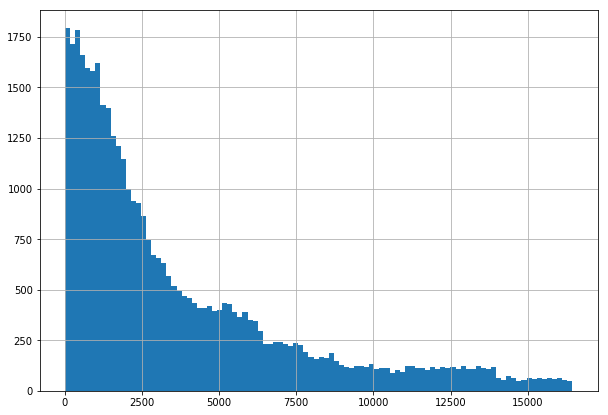

In [209]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

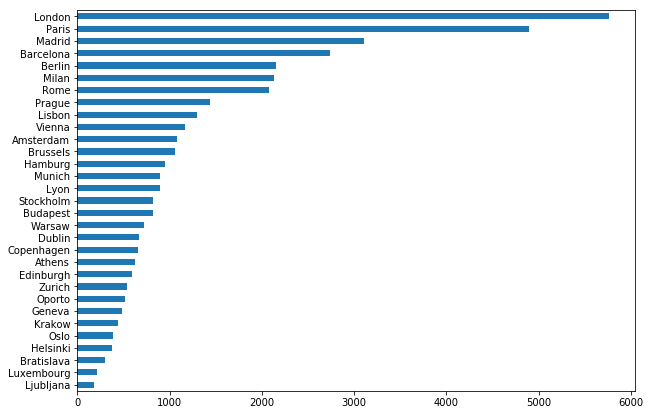

In [210]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

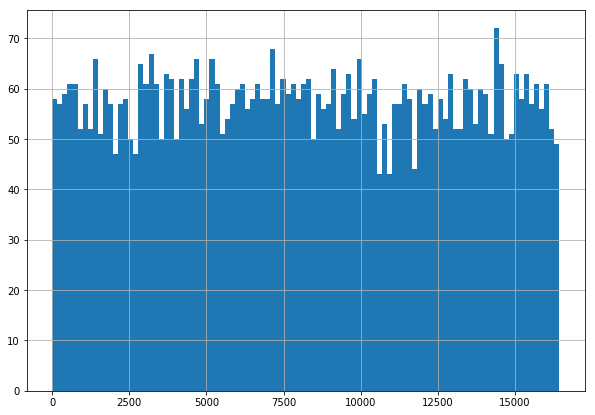

In [211]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

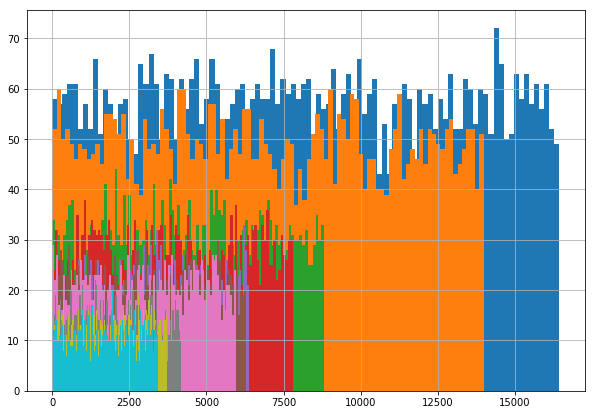

In [212]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

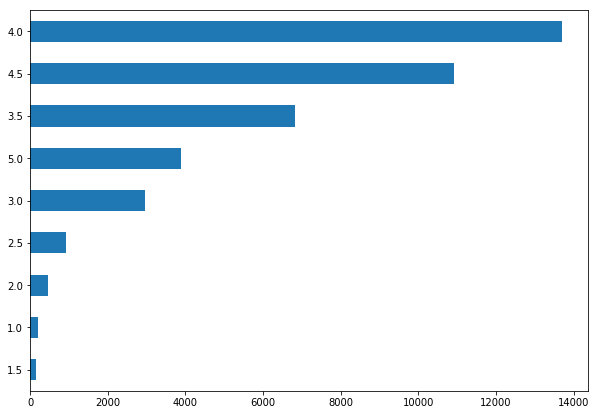

In [213]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

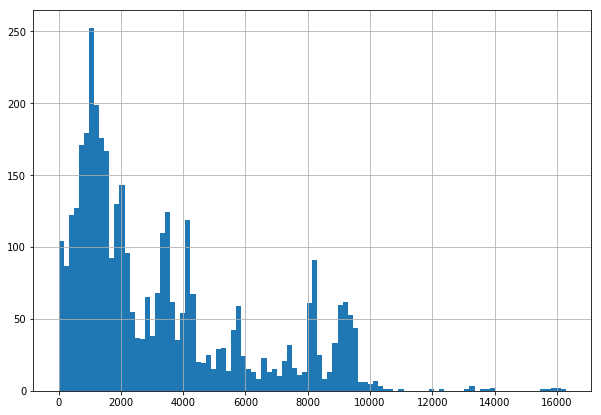

In [214]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

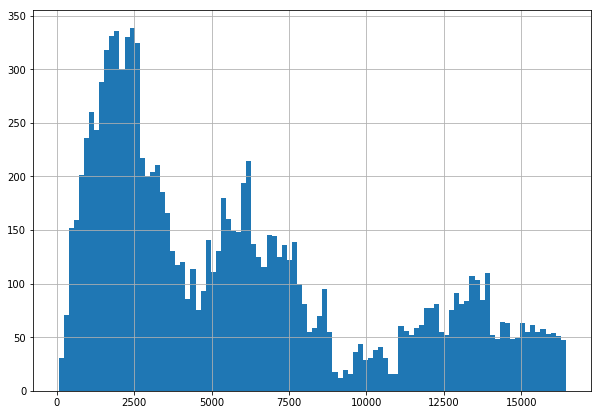

In [215]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

In [216]:
#Имеет смысл посмотреть на признаки, которые мы создали:

In [217]:
data[['bednights2016','Ranking','how_expensive','Cusine_variety',
           'nutricion_concious','mean_age_of_review','Tone','Rating']].corr()

,bednights2016,Ranking,how_expensive,Cusine_variety,nutricion_concious,mean_age_of_review,Tone,Rating
bednights2016,1.000000,-0.015122,-0.027095,0.004259,0.056911,-0.033888,-0.016093,-0.013046
Ranking,-0.015122,1.000000,-0.141845,-0.543255,-0.553424,0.363627,-0.256821,-0.168728
how_expensive,-0.027095,-0.141845,1.000000,0.119503,0.114038,-0.051655,0.041509,-0.009750
Cusine_variety,0.004259,-0.543255,0.119503,1.000000,0.706056,-0.344147,0.195264,0.034506
nutricion_concious,0.056911,-0.553424,0.114038,0.706056,1.000000,-0.325240,0.181443,0.040205
mean_age_of_review,-0.033888,0.363627,-0.051655,-0.344147,-0.325240,1.000000,0.001864,-0.035531
Tone,-0.016093,-0.256821,0.041509,0.195264,0.181443,0.001864,1.000000,0.033413
Rating,-0.013046,-0.168728,-0.009750,0.034506,0.040205,-0.035531,0.033413,1.000000


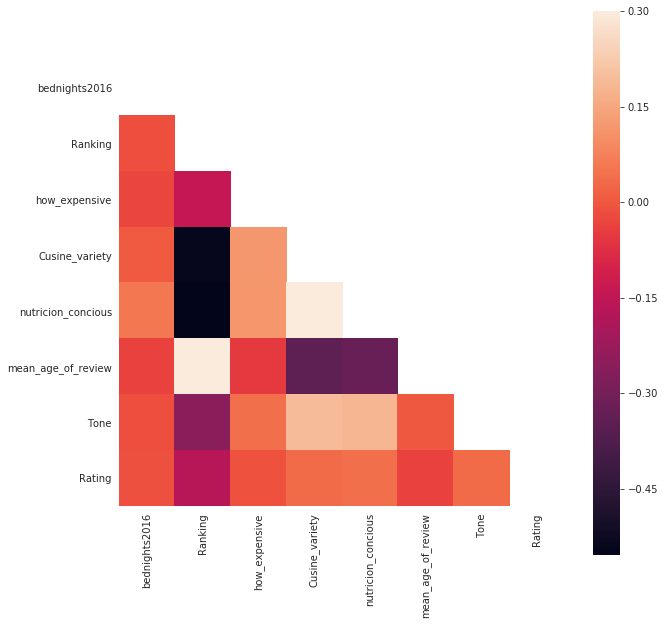

In [218]:
corr = data[['bednights2016','Ranking','how_expensive','Cusine_variety',
           'nutricion_concious','mean_age_of_review','Tone','Rating']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [219]:
# Когда люди чаще оставляют отзывы?


df['review_month1']=df['review1date'].apply(lambda x:0 if x==0 else x.strftime("%b"))
df['review_month2']=df['review2date'].apply(lambda x:0 if x==0 else x.strftime("%b"))
review_months1=df[df['review_month1']!=0].groupby(['review_month1'],sort=False)['Restaurant_id'].count()
review_months1=review_months1.reset_index()
review_months1.columns=['Review_month','Review_count']
review_months1=review_months1.sort_values(by='Review_month', ascending=False)
review_months1=review_months1.set_index('Review_month')
review_months2=df[df['review_month2']!=0].groupby(['review_month2'],sort=False)['Restaurant_id'].count()
review_months2=review_months2.reset_index()
review_months2.columns=['Review_month','Review_count']
review_months2=review_months2.sort_values(by='Review_month', ascending=False)
review_months2=review_months2.set_index('Review_month')
df_month=(review_months2+review_months1).sort_values(by='Review_count', ascending=False).reset_index()
display(df_month)

KeyError: 'review1date'

In [ ]:
plt.figure(figsize=(8,6))

reveiw_months = sns.barplot(
                            x='Review_month', y='Review_count', 
                           data=df_month
                          ) 
reveiw_months.set_title('Люди склонны оставлять больше отзывов в зимнее время ', y=1.1, fontsize=25)

In [ ]:
variety_by_city=df[['City','Cusine_variety','Rating']]#.groupby('City')['Cusine_variety'].mean()
top_ranking=variety_by_city.groupby('City',sort=False)['Rating'].mean()
top_ranking=top_ranking.sort_values(ascending=False)


In [ ]:
figure_variety=plt.figure()

variety_axes=figure_variety.add_axes([0,0,2,1])

variety_by_city_plot1=variety_by_city['Cusine_variety']

variety1=variety_by_city[variety_by_city['City']=='Rome']['Cusine_variety']
variety2=variety_by_city[variety_by_city['City']=='Athens']['Cusine_variety']
variety3=variety_by_city[variety_by_city['City']=='Oporto']['Cusine_variety']
variety4=variety_by_city[variety_by_city['City']=='Krakow']['Cusine_variety']
variety5=variety_by_city[variety_by_city['City']=='Paris']['Cusine_variety']
variety6=variety_by_city[variety_by_city['City']=='Milan']['Cusine_variety']
variety7=variety_by_city[variety_by_city['City']=='Amsterdam']['Cusine_variety']
variety8=variety_by_city[variety_by_city['City']=='Berlin']['Cusine_variety']

variety_axes.boxplot([variety1,variety2,variety3,variety4,variety5,variety6,variety7,variety8],notch=True,patch_artist=True)
font_t = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18}
        
variety_axes.set_title('Сравнительное разнообразие представленных направлений кухни в ресторанах по городам' ,fontdict=font_t)
variety_axes.set(xlabel='Города', ylabel='Разнообразие')
variety_axes.set_xticklabels(['Rome','Athens','Oporto','Krakow','Paris','Milan','Amsterdam','Berlin'], fontsize=12)
           
plt.show


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [ ]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

In [ ]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    
    df_output.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
    df_output['Number of Reviews'].fillna(0, inplace=True)
    
    #PRICE RANGE
    df_output['how_expensive']=df_output['Price Range'].apply(level_of_prices)
    df_output['how_expensive']=df_output.apply(lambda x: swap_zeros(x['how_expensive'],x['City']),axis=1)
    
    #CITIES
    dummy=pd.get_dummies(df_output.City,columns=['City'],prefix='',prefix_sep='')
    df_output=pd.concat([df_output,dummy],axis=1) 
    df_output['Country']=df_output['City'].apply(lambda x:countries_dict[0][x])
    df_output['Nr_restaurants']=df_output['City'].apply(lambda x:rest_disct[0][x])
    df_output['Ranking']=df_output['Ranking']/df_output['Nr_restaurants']
    df_output['bednights2016']=df_output['Country'].apply(lambda x:bednights2016_dict[0][x])
    
    #REVIEWS
    df_output['review1date']=df_output['Reviews'].apply(date1_extraction) #промежут
    df_output['review2date']=df_output['Reviews'].apply(date2_extraction) #промежут
    df_output['age_of_review1']=df_output['review1date'].apply(age_of_review)  #промежут
    df_output['age_of_review2']=df_output['review2date'].apply(age_of_review)  #промежут
    df_output['age_of_review1']=df_output['age_of_review1'].apply(lambda x: 257 if x==0 else x) #промежут
    df_output['age_of_review2']=df_output['age_of_review2'].apply(lambda x: 257 if x==0 else x) #промежут
    df_output['mean_age_of_review']=df_output.apply(lambda x:mean_age(x['age_of_review1'],x['age_of_review2']),axis=1) #Финальный
    df_output['Tone']=df_output['Reviews'].apply(match_word)
    
    #CUISINE
    df_output['Cusine_variety']=df_output['Cuisine Style'].apply(variety)
    df_output['nutricion_concious']=df_output['Cuisine Style'].apply(categorization)
    df_output['european']=df_output['Cuisine Style'].apply(categorization)
    df_output['ethnic']=df_output['Cuisine Style'].apply(categorization)
    data['non_specific']=data['Cuisine Style'].apply(categorization)
    
    # ################### 5. Clean #################################################### 
    # Избавимся от ненужных столбцов - извините, у вас код, конечно, круче, но мне надо избавиться не только от объектов, у меня там время
    df_output=df_output.drop(['review1date', 'review2date','Cuisine Style','Price Range','City',
                              'Reviews','Country','age_of_review1','age_of_review2','Nr_restaurants'],axis=1)
    display(df_output.shape)
    return df_output

#### Запускаем и проверяем что получилось

In [ ]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

In [ ]:
df_preproc.info()

In [ ]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [ ]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

# Model 
Сам ML

In [ ]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [ ]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [ ]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [ ]:
test_data.sample(10)

In [ ]:
test_data = test_data.drop(['Rating'], axis=1)

In [ ]:
sample_submission

In [ ]:
predict_submission = model.predict(test_data)

In [ ]:
predict_submission

In [ ]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)